# Module 9 SQLite

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

### Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Exploratory Climate Analysis

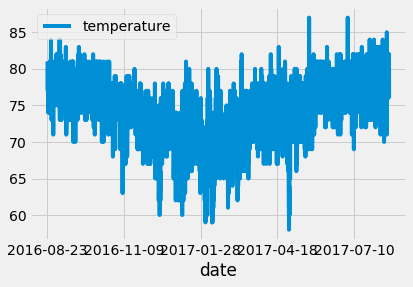

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'temperature'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
# print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [70]:
# Use Pandas to calcualte the summary statistics for the precipitation data

       temperature
count  2230.000000
mean     74.590583
std       4.611667
min      58.000000
25%      72.000000
50%      75.000000
75%      78.000000
max      87.000000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

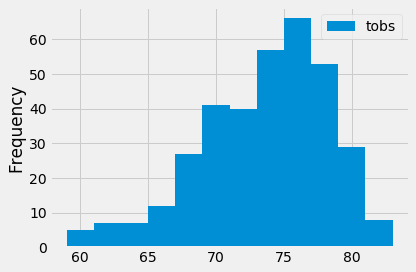

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [65]:
date = dt.date(2017, 6, 23)
session.query(Measurement.date).filter(Measurement.date >= date).all()

[('2017-06-23'),
 ('2017-06-24'),
 ('2017-06-25'),
 ('2017-06-26'),
 ('2017-06-27'),
 ('2017-06-28'),
 ('2017-06-29'),
 ('2017-06-30'),
 ('2017-07-01'),
 ('2017-07-02'),
 ('2017-07-03'),
 ('2017-07-04'),
 ('2017-07-05'),
 ('2017-07-06'),
 ('2017-07-07'),
 ('2017-07-08'),
 ('2017-07-09'),
 ('2017-07-10'),
 ('2017-07-11'),
 ('2017-07-12'),
 ('2017-07-13'),
 ('2017-07-14'),
 ('2017-07-15'),
 ('2017-07-16'),
 ('2017-07-17'),
 ('2017-07-18'),
 ('2017-07-20'),
 ('2017-07-21'),
 ('2017-07-22'),
 ('2017-07-23'),
 ('2017-07-24'),
 ('2017-07-25'),
 ('2017-07-26'),
 ('2017-07-27'),
 ('2017-07-28'),
 ('2017-07-29'),
 ('2017-07-30'),
 ('2017-07-31'),
 ('2017-08-01'),
 ('2017-08-02'),
 ('2017-08-03'),
 ('2017-08-04'),
 ('2017-08-05'),
 ('2017-08-06'),
 ('2017-08-07'),
 ('2017-08-08'),
 ('2017-08-09'),
 ('2017-08-10'),
 ('2017-08-11'),
 ('2017-08-12'),
 ('2017-08-13'),
 ('2017-08-14'),
 ('2017-08-15'),
 ('2017-08-18'),
 ('2017-08-19'),
 ('2017-08-20'),
 ('2017-08-21'),
 ('2017-08-22'),
 ('2017-08-23'

## Challenge

### Identifing key statistical data in June across all of the stations and years using the describe() function.

In [197]:
# S
June_start = dt.date(2010, 6, 1)
June_end = dt.date(2010, 6, 30)

june_prcp_results = []
june_tobs_results = []

for year in range(2011, 2020,1):

# The following while loop would work; however, it does not take into consideration of leap years, which shifts the data by 2 days at the end.
# while June_start <= dt.date(2017,8,23):
    
    june_prcp_results += session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= June_start).\
    filter(Measurement.date <= June_end).\
    group_by(Measurement.date).all()

    june_tobs_results += session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= June_start).\
    filter(Measurement.date <= June_end).\
    group_by(Measurement.date).all()

# While the following incrementation would work; however, it does not take into consideration of leap years, , which shifts the data by 2 days at the end.
#     June_start = June_start + dt.timedelta(seconds=31557600)
#     June_end = June_end + dt.timedelta(seconds=31557600)

    June_start = dt.date((year), 6, 1)
    June_end = dt.date((year), 6, 30)

    
    # Save the query results as a Pandas DataFrame and set the index to the date column
june_prcp_df = pd.DataFrame(june_prcp_results, columns=['date', 'precipitation'])
june_tobs_df = pd.DataFrame(june_tobs_results, columns=['date', 'temperature'])

june_prcp_stats_df = pd.DataFrame(june_prcp_df.describe())
june_tobs_stats_df = pd.DataFrame(june_tobs_df.describe())

print("Overall June Temperature Stats:")
print(june_tobs_stats_df)
print("\nOverall June Percipitation Stats:")
print(june_prcp_stats_df)

Overall June Temperature Stats:
       temperature
count   240.000000
mean     77.491667
std       1.881404
min      70.000000
25%      77.000000
50%      78.000000
75%      79.000000
max      84.000000

Overall June Percipitation Stats:
       precipitation
count     237.000000
mean        0.023586
std         0.089633
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         0.890000


### Identifing key statistical data in December across all of the stations and years using the describe() function.

In [198]:
dec_start = dt.date(2010, 12, 1)
dec_end = dt.date(2010, 12, 31)

dec_prcp_results = []
dec_tobs_results = []

for year in range(2011, 2020,1):

# The following while loop would work; however, it does not take into consideration of leap years, which shifts the data by 2 days at the end.
# while dec_start <= dt.date(2017,8,23):
    
    dec_prcp_results += session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= dec_start).\
    filter(Measurement.date <= dec_end).\
    group_by(Measurement.date).all()

    dec_tobs_results += session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= dec_start).\
    filter(Measurement.date <= dec_end).\
    group_by(Measurement.date).all()

# While the following incrementation would work; however, it does not take into consideration of leap years, , which shifts the data by 2 days at the end.
#     dec_start = dec_start + dt.timedelta(seconds=31557600)
#     dec_end = dec_end + dt.timedelta(seconds=31557600)

    dec_start = dt.date((year), 12, 1)
    dec_end = dt.date((year), 12, 31)

# Save the query results as a Pandas DataFrame and set the index to the date column
dec_prcp_df = pd.DataFrame(dec_prcp_results, columns=['date', 'precipitation'])
dec_tobs_df = pd.DataFrame(dec_tobs_results, columns=['date', 'temperature'])

dec_prcp_stats_df = pd.DataFrame(dec_prcp_df.describe())
dec_tobs_stats_df = pd.DataFrame(dec_tobs_df.describe())

print("Overall December Temperature Stats:")
print(dec_tobs_stats_df)
print("\nOverall December Percipitation Stats:")
print(dec_prcp_stats_df)
print("\n*No Data exists for Dec 2017, which is why the count is 214; it is a missing a month of data.")

Overall December Temperature Stats:
       temperature
count   217.000000
mean     71.119816
std       3.504550
min      56.000000
25%      69.000000
50%      72.000000
75%      74.000000
max      77.000000

Overall December Percipitation Stats:
       precipitation
count     214.000000
mean        0.112383
std         0.454108
min         0.000000
25%         0.000000
50%         0.000000
75%         0.040000
max         4.940000

*No Data exists for Dec 2017, which is why the count is 207; it is a missing a month of data.


### Comparing findings between the month of June and December

In [195]:
prcp_comp_df = june_prcp_stats_df.join(dec_prcp_stats_df, lsuffix=' for june', rsuffix=' for december')
prcp_comp_df['difference'] = prcp_comp_df['precipitation for june'] - prcp_comp_df['precipitation for december']
prcp_comp_df

,precipitation for june,precipitation for december,difference
count,237.000000,214.000000,23.000000
mean,0.023586,0.112383,-0.088797
std,0.089633,0.454108,-0.364475
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.010000,0.040000,-0.030000
max,0.890000,4.940000,-4.050000


In [196]:
tobs_comp_df = june_tobs_stats_df.join(dec_tobs_stats_df, lsuffix=' for june', rsuffix=' for december')
tobs_comp_df['difference'] = tobs_comp_df['temperature for june'] - tobs_comp_df['temperature for december']
tobs_comp_df

,temperature for june,temperature for december,difference
count,240.000000,217.000000,23.000000
mean,77.491667,71.119816,6.371851
std,1.881404,3.504550,-1.623147
min,70.000000,56.000000,14.000000
25%,77.000000,69.000000,8.000000
50%,78.000000,72.000000,6.000000
75%,79.000000,74.000000,5.000000
max,84.000000,77.000000,7.000000
